## EAS 503 Homework 3 Submission
Name - _Boobalaganesh Ezhilan_

**Make sure that you rename the notebook file to *replacewithubitname*_eas503_hw3.ipynb**


### Submission Details 
* **Due Date** - November 13, 2018 by 11:59 PM EST. All assignments have to be submitted using UBLearns.
* **Number of Problems** - 3 
* **Maximum points** - 100
* **Collaboration policy**
 - Every student has to submit individual homeworks
 - Any collaboration, in the form of discussion, with other members of the class is permitted, as long as the names of the collaborating members are explicitly stated on top of the submitted homework.
 - Any overlap with another submission or material from Internet will be awarded an F.
* **Late submission policy** - _No late submissions allowed_
* **Submission Format** - Enter code for each problem in the appropriate cell below. You may use multiple cells for a single problem to improve readability.

### Problem 1 - Using regular expressions in `Python` (50 points)

In this problem you will write a rudimentary web crawler to extract information from `Wikipedia`.

The three requirements for this problem are:
##### 1. Get a chronological list of US Presidents from the [List of Presidents of the United States](https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States) wikipedia entry (20 points). 

You will have to write a function called `getPresidents(url)` which takes one argument, a string containing the url, and returns the list of URLs for the wikipedia pages for each US President in the chronological order of their presidency, i.e., `['https://en.wikipedia.org/wiki/George_Washington', 'https://en.wikipedia.org/wiki/John_Adams'] ...`

The url argument to the function should be - https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States

You will notice that one president, Grover Cleveland, will appear twice. For his case, remove the second entry. Reason he comes twice will be apparent once you visit his entry on `Wikipedia`. While there you will also notice that he was the Mayor of Buffalo once, which is why we have the Grover Cleveland Highway in South Campus.

To write this function you will need to use the module `requests` which allows grabbing the html from any url. For instance:
```python
import requests
import re

url = "https://www.cse.buffalo.edu"
urlreq = request.get(url)
urltext = urlreq.txt
urllines = re.split(r'\n',urltext)
```

In the above snippet, urllines will be a `list` containing lines of the html code in the above website.

You will then write a parser that will go through the html lines and extract the list of presidents. You can check the actual page to see where that list is. 

**Note:** No points will be awarded to this problem if you have manually created the list or derived the list from an alternative url.

##### 2. Parse each President entry in `Wikipedia` and extract his date of birth. (20 points)
On each President's wikipedia entry, the `infobox` on the right lists, among other things, his exact birthday. Implement a function, called `getBirthdays(urls)` which takes as input the list that is returned by the above implemented `getPresidents(url)` function and returns a `Pandas` `TimeSeries` object, that simply contains the names of the Presidents as the value, and the birthdate as the time index.

##### 3. Plot an annotated `timeline` plot using `matplotlib`. (10 points)
Use `matplotlib` routines to plot **time line** of the US presidents, where the x-axis corresponds to time from 1720 until 2000 and y-axis denotes the birthdate for each president. The timeline plot should look similar to:

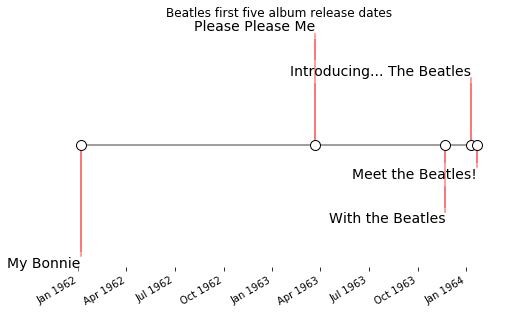

You will need to adjust the heights, font sizes, etc., to make it look clean.

Note that there is not direct function for plotting a module, you will just need to iterate over the values to create several overlaid plots with desired effects.

#### Points breakup:
This problem is worth 50 points, and first two subparts are worth 20 points each. For the plotting subpart, a clean looking plot with all information will fetch you 10 points. A cluttered plot, with all information, will only fetch you 5 points.

In [4]:
#Function to return united state presidents in chronological order
import requests
import re
import pandas as pd
def getBirthdays(presidentWiki):
    presidentBirthDate = []
    presidentName = []
    for url in presidentWiki:
        urlreq = requests.get(url)
        urltext = urlreq.text
        patternMatch = re.split(r'\n',urltext)
        presidentName.append(url.split('/')[4].replace('_',' '))
        for urlLine in patternMatch:
            if('<span class="bday">' in urlLine):
                patternUrl = re.match(r'(.*)<span class="bday">([0-9]{4}-[0-9]{2}-[0-9]{2})</span>(.*)',urlLine)
                presidentBirthDate.append(patternUrl.group(2))
    birthDate = pd.DatetimeIndex(presidentBirthDate)
    timeSeries = pd.Series(birthDate,presidentName)
    return timeSeries,birthDate,presidentName

In [5]:
#Function to calculate president name and corresponding birthdate
def getPresidents(url):
    presidentUrl = []
    presidentHtml = []
    urlreq = requests.get(url)
    urltext = urlreq.text
    pattern = re.compile(r'<li><a href="/wiki/+.+\(<a href+.+\d\d\d\d')
    urllines = pattern.finditer(urltext)
    for urlline in urllines:
        indexs = urlline.span()
        presidentHtml.append(urltext[int(indexs[0]) : indexs[1]])
    pattern = re.compile(r'(\/[a-zA-Z]+_+.+[a-zA-Z]+\")')
    for url in presidentHtml:
        patternMatch = pattern.finditer(url)
        index = patternMatch.__iter__().__next__().span()
        start = int(index[0])
        end =  start + url[start : ].find('\"')
        presidentUrl.append("https://en.wikipedia.org/wiki"+url[start : end])
    newList = sorted(set(presidentUrl), key=lambda x: presidentUrl.index(x))
    print("Chronological order of the president of United States")
    print(*newList,sep='\n')
    return newList

presidentWiki = getPresidents("https://en.wikipedia.org/wiki/List_of_Presidents_of_the_United_States")  
timeSeries,birthDate,presidentName = getBirthdays(presidentWiki)
print("\n")
print("President Name and birthdate")
print(timeSeries)

Chronological order of the president of United States
https://en.wikipedia.org/wiki/George_Washington
https://en.wikipedia.org/wiki/John_Adams
https://en.wikipedia.org/wiki/Thomas_Jefferson
https://en.wikipedia.org/wiki/James_Madison
https://en.wikipedia.org/wiki/James_Monroe
https://en.wikipedia.org/wiki/John_Quincy_Adams
https://en.wikipedia.org/wiki/Andrew_Jackson
https://en.wikipedia.org/wiki/Martin_Van_Buren
https://en.wikipedia.org/wiki/William_Henry_Harrison
https://en.wikipedia.org/wiki/John_Tyler
https://en.wikipedia.org/wiki/James_K._Polk
https://en.wikipedia.org/wiki/Zachary_Taylor
https://en.wikipedia.org/wiki/Millard_Fillmore
https://en.wikipedia.org/wiki/Franklin_Pierce
https://en.wikipedia.org/wiki/James_Buchanan
https://en.wikipedia.org/wiki/Abraham_Lincoln
https://en.wikipedia.org/wiki/Andrew_Johnson
https://en.wikipedia.org/wiki/Ulysses_S._Grant
https://en.wikipedia.org/wiki/Rutherford_B._Hayes
https://en.wikipedia.org/wiki/James_A._Garfield
https://en.wikipedia.org/w

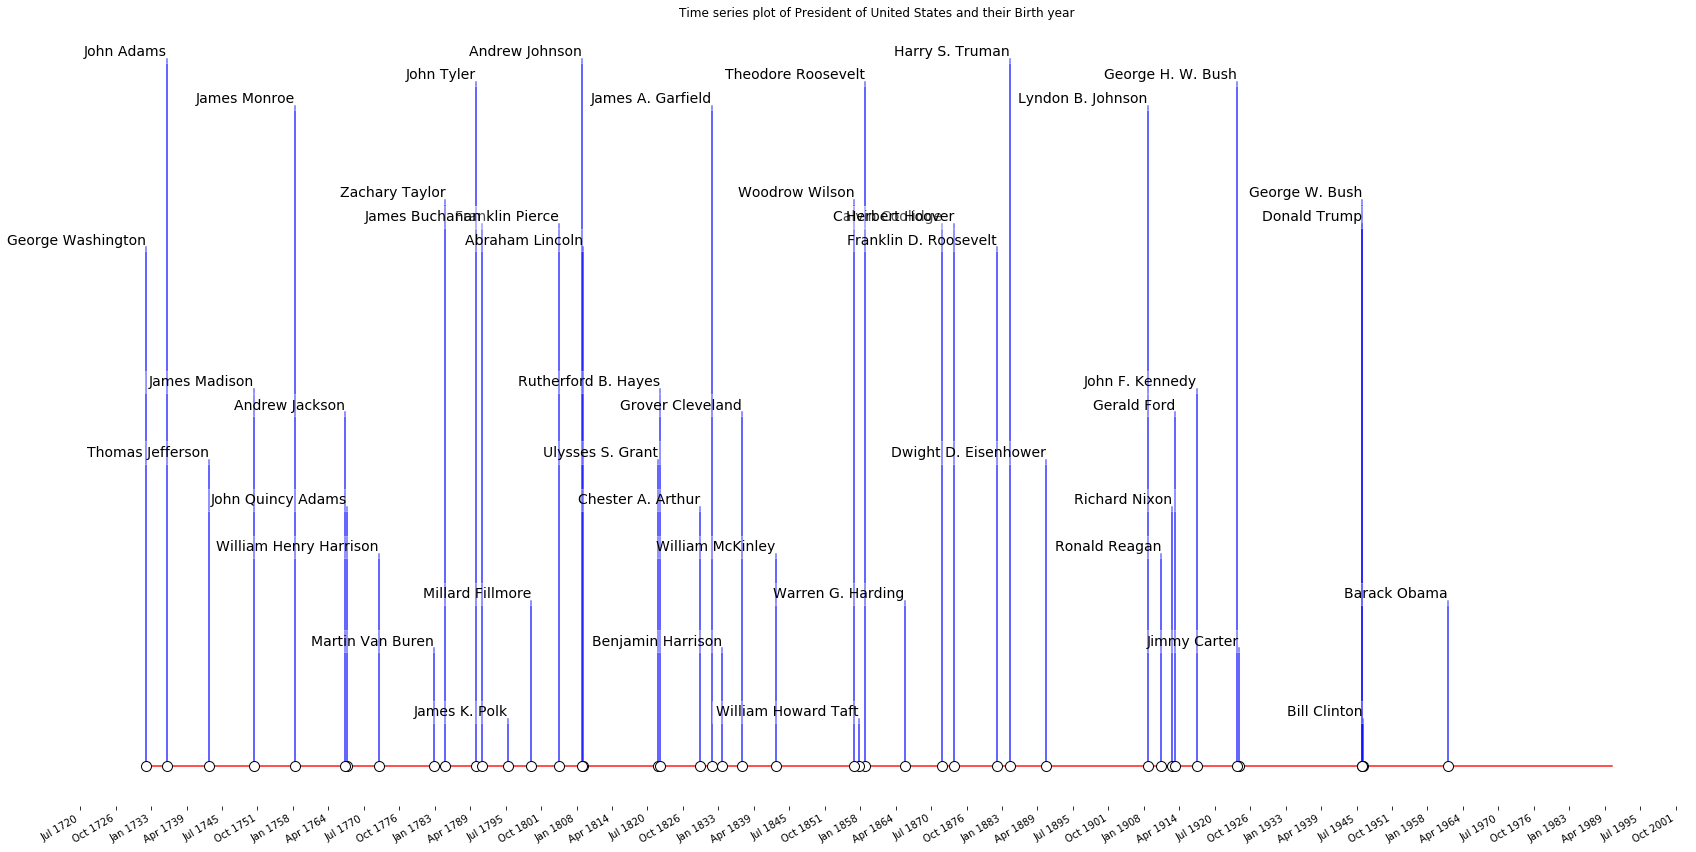

In [56]:
#Funtion to plot timeseries of the Presidents and their birth date
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import numpy as np

fig, ax = plt.subplots(figsize=(29, 16))
ax.set(title="Time series plot of President of United States and their Birth year")


date_text = "01MAR1732"
date_text1 = "01AUG1990"
date = datetime.datetime.strptime(date_text, "%d%b%Y")
date_ = datetime.datetime.strptime(date_text1, "%d%b%Y")
levels = np.array(birthDate.day)
start = date
stop = date_
ax.plot((start, stop), (0, 0), 'r', alpha=.9)
for ii, (iname, idate) in enumerate(zip(presidentName, birthDate)):
    level = levels[ii % 15]
    vert = 'top' if level < 0 else 'bottom'
    ax.scatter(idate, 0, s=100, facecolor='w', edgecolor='k', zorder=9999)
    ax.plot((idate, idate), (0, level), c='b', alpha=.8)
    ax.text(idate, level, iname,
            horizontalalignment='right', verticalalignment=vert, fontsize=14,
            backgroundcolor=(1., 1., 1., .3))
ax.yaxis.set_major_formatter(FormatStrFormatter('%10f'))
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=75))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))


fig.autofmt_xdate()

plt.setp((ax.get_yticklabels() + ax.get_yticklines() +
          list(ax.spines.values())), visible=False)
plt.show()

### Problem 2 - Chicago Crime Data (25 points)

The Chicago Crime Data reflects the crime incidents that occured in the city of Chicago during 2016 and 2017. The data is provided in the `chicago_crime_data_v3.csv` file. For each crime incident, there is information regarding the case ID, crime location, description, primary crime type ID, coordinates of the crime etc. To identify the primary crime type (denoted by the `Primary type` variable), the `primary_type_ID.csv` file is provided which maps the primary crime type to their corresponding ID.

For this problem, the goal is to identify the crime types that have occurred more than 10,000 times during the years 2016 and 2017. For this,

1. Import the CSV files as dataframes using pandas.

2. Sort the crime data file by crime ID and merge the two files by `Primary Type ID` variable. 

3. Identify the crime types that have a frequency >10,000 and list them as `High Frequency Crime Types`. Provide a timeseries plot for all `High Frequency Crime Types`. For this, compute the number of crimes that occur per each crime type per month (2016 Jan - 2017 Dec). Use the `series.plot` method in Pandas for Series objects. 

4. Using the code provided below, plot all the crimes that come under `High Frequency Crime Types` on a map of Chicago. For this, use the location information provided in the data. For any crimes with missing location coordinates, sort the data by ascending `Date` and use forward fill.  

(Make sure that each data point must be plotted as a transparent circular dots with a markersize of atleast 20 and alpha set to atmost 0.5 (transparency))

_Installation Notes_: You will need the `basemap` package. You can get that using:
```script
conda install basemap
```

Due to some bug in the way `conda` maintains environmental variables, the following import statement might not work:
```python
from mpl_toolkits.basemap import Basemap
```

If it does not work on your computer, try the following:
```python
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
```

In [ ]:
import pandas as pd
primaryTypeList = []
crimeData = pd.read_csv("chicago_crime_data_v3.csv") 
primaryData = pd.read_csv("primary_type_id.csv") 
crimeData.sort_values("Cime_ID", inplace=True)
crimeData.head()
mergeData = pd.merge(crimeData, primaryData, on='Primary Type ID')
primaryTypeList = primaryData["Primary Type"]
frequentCrimeRate  = mergeData['Primary Type'].value_counts()
frequentCrimeRate[frequentCrimeRate>10000]
mergeData['Date'] = pd.to_datetime(mergeData['Date'])
mergeData['mnth_yr'] = mergeData['Date'].apply(lambda x: x.strftime('%B-%Y'))

In [ ]:
sample = []
sample1 = []
countIndex = []
highFrequencyCrimeRates=  []
frequentCrimeRate  = mergeData['Primary Type'].value_counts()
sample = frequentCrimeRate[frequentCrimeRate>10000]
for i in range(len(sample)):
    countIndex.append(sample.index[i])
for j in range(len(countIndex)):
    result = (mergeData.loc[mergeData['Primary Type'] == str(countIndex[j])])
    sample1.append(result)
    frames = sample1
    highFrequencyCrimeRates = pd.concat(frames)

In [ ]:
import matplotlib.pyplot as plt
for i in countIndex:
    x=highFrequencyCrimeRates[highFrequencyCrimeRates['Primary Type']==i]['mnth_yr'].value_counts()
    x.plot.bar()
    plt.title(i)
    plt.xlabel('Months')
    plt.ylabel('No of Crimes')
    plt.show()

In [ ]:
import os,conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[16,10])
m = Basemap(projection='merc',llcrnrlat=41.60,urcrnrlat=42.10,\
        llcrnrlon=-88.0,urcrnrlon=-87.50,lat_ts=20,resolution='c')
m.readshapefile('./geo_export_0e3da441-8fe8-4e11-9ca0-42ef75cab68e','chicago')

basemap_df = highFrequencyCrimeRates.iloc[:,np.r_[2,11,12]]
basemap_df = basemap_df.sort_values("Date").fillna(method='ffill').fillna(method='backfill')
lons = list(basemap_df["Longitude"])
lats = list(basemap_df["Latitude"])
x,y = m(lons,lats)
plt.scatter(x,y,alpha=0.1,s=10)
plt.title("Chicago Cenus Tracts")
plt.show()

In [ ]:
#Sample plot points 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x=[1,2,3,4,5]
y=[1,2,5,8,10]
plt.plot(x,y,'bo', markersize=10,alpha=0.1)

### Problem 3 - Benchmarking Problem (25 Points)

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries (use `numpy.random`). Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy ufunc)

1. Sorting `B` (you can use `numpy.sort`) for `N` ranging from 1000 to 25000 (take steps of 1000)
2. Computing Determinant of `A` ( you can use `numpy.linalg.det` to compute the determinant of the matrix) for `N` ranging from 100 to 800 (take steps of 50)
3. Matrix Multiplication of `A*A` ( use `numpy.matmul`) for `N` ranging from 100 to 1500 

Plot the operation times for Numpy functions vs regular python commands for each operation.

The final output must include 3 plots comparing the performance of universal functions in Numpy with similar analogs in python for each operation. Provide a breif interpretation from the plots. (Feel free to test around the range of `N` for this problem).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
def numpySort():
    NumpySortList = [];
    for i in range(1000,2500,100):
        B=np.random.rand(i)
        startTime = time.time();
        C= np.sort(B ,axis=0)
        endTime = time.time();
        NumpySortList.append(endTime-startTime)
    return NumpySortList

def normalSort():
    normalSortlist = []
    for i in range(1000,2500,100):
        B=np.random.rand(i)
        startTime = time.time();
        for i in range(len(B)):
            for j in range(len(B) - 1):
                if B[j] > B[j+1]:
                    B[j], B[j + 1] = B[j + 1], B[j]
        endTime = time.time();            
        normalSortlist.append(endTime-startTime)        
    return normalSortlist  

In [ ]:
NumpySortTime = numpySort()
normalSortlist = normalSort()
x = list(range(1,16))
plt.plot(x,normalSortlist,'b',label = 'Normal Time Taken')
plt.plot(x,NumpySortTime,'r',label = 'Numpy Time Taken')
plt.ylabel("Time Taken")
plt.xlabel("iterations")
plt.legend(loc='upper center',shadow = True,fontsize = 'small')

0.0
0.003996849060058594
0.04497504234313965
0.22886872291564941
2.011850595474243
19.43892192840576


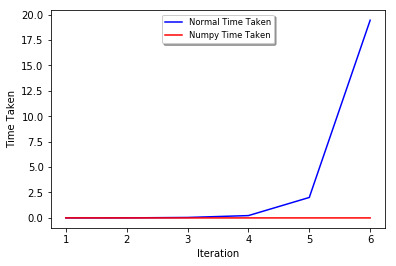

In [3]:
NumpyDeterminantList = []
def numpyDeterminant():
    for j in range(5,11):
        A = np.random.rand(j,j)
        startTime = time.time()
        X = np.linalg.det(A)
        endTime = time.time()
        NumpyDeterminantList.append(endTime-startTime)
    return NumpyDeterminantList

NormalDeterminantList = []
def normalDeterminant():
    for j in range(5,11):
        A = np.random.rand(j,j)
        startTime = time.time()
        determinantOfMatrix(A,len(A))
        endTime = time.time()
        time_ = endTime-startTime
        print(time_)
        NormalDeterminantList.append(time_)
    return NormalDeterminantList        
              
def determinantOfMatrix(A,n):
    if len(A) == 1:
        determinant = ((n * A[0][0])*2)/10
        return determinant
    sign = 1
    sumCoeff = 0
    for i in range(len(A)):
        newMat = []
        for j in range(1, len(A)):
            coeff = []
            for k in range(len(A)):
                if k != i:
                    coeff.append(A[j][k])
            newMat.append(coeff)
        sign = -sign 
        sumCoeff = sumCoeff + n * determinantOfMatrix(newMat, sign * A[0][i])
    return sumCoeff

numpyDeterminantList = numpyDeterminant()
normalDeterminantList = normalDeterminant()
x = list(range(1,7))
plt.plot(x,normalDeterminantList,'b',label = 'Normal Time Taken')
plt.plot(x,numpyDeterminantList,'r',label = 'Numpy Time Taken')
plt.xlabel("Iteration")
plt.ylabel("Time Taken")
plt.legend(loc='upper center',shadow = True,fontsize = 'small')    
    

In [ ]:
NumpyMatrixList = []
def NumpyMatrixMulti():
    for k in range(100,500,100):
        A1 = np.random.rand(k,k)
        startTime = time.time()
        np.matmul(A1,A1)
        endTime = time.time()
        NumpyMatrixList.append(endTime-startTime)
    return NumpyMatrixList

NormalMatrixList = []        
def NormalMatrixMulti():
    for k in range(100,500,100):
        A1 = np.random.rand(k,k)
        n=len(A1)
        startTime = time.time()
        matrixMulti(A1,n)
        endTime = time.time()
        NormalMatrixList.append(endTime-startTime)
    return NormalMatrixList
    
def matrixMulti(A,n):
    NewMat = [];
    for i in range(0,n):
        prodMat = [];
        for j in range(0,n):
            matSum = 0
            for k in range(0,n):
                matSum = matSum + A[i][k]*A[k][j]
            prodMat.insert(j,matSum)  
        NewMat.insert(i,prodMat)
    NewMat = np.array(NewMat)   
    return NewMat


numpyMatrixMultiList = NumpyMatrixMulti()
normalMatrixMultiList = NormalMatrixMulti()
x = list(range(1,5))
plt.plot(x,normalMatrixMultiList,'b',label = 'Normal Time Taken')
plt.plot(x,numpyMatrixMultiList,'r',label = 'Numpy Time Taken')
plt.xlabel("Iteration")
plt.ylabel("Time Taken")
plt.legend(loc='upper center',shadow = True,fontsize = 'small')  

### Problem 3 - Inference for Benchmarking

### Sorting
In normal operation I performed Bubble sort to sort the matrix which has the time complexity of O(N^2) so it will remain the same through the matrix sorting so that the reason for the curve is linear but in case of Numpy by default it will start with quick sort with best time complexity of O(Nlogn) when N increse (i.e worst case of quick sort O(N^2)) it will change into Heap sort so time complexity will be O(Nlogn) through out latest version of numpy uses intro sort to maintain time complexity if the heap sort is not making any process.

### Determinant
In case of Matrix determinant curve I had used recursive process so the time complexity will become O(N!) so when we look into the graph time complexity increseases recursively while when we look into Numpy it LU decomposition method which has the time complexity of O(N^3) so Numpy is performing better than the normal matrix multiplication operation

### Multiplication
Numpy is performing better than the other normal matrix operation this is because of the reason that NumPy uses a highly-optimized, carefully-tuned BLAS method for matrix multiplication.For example in case of Quad core processor it will spread the work parallely to all the four processor chip while normal matrix operation or other operation it won't spread to all four processor chip parallely instead it will wait for one chip to complete one task and then assign the task to the same chip.And also Numpy will check whether each row or column is contiguous and iterate over each contiguous part first.And also Numpy uses nd.array to compute matrix multiplication but I had used list to compute so array are faster than list So because of these reasons Numpy is performing better than normal matrix Multiplication

